# Lab 2: Probability, Distributions, and Statistical Questions

#### Kevin J. Wang

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal

plt.rcParams["figure.figsize"] = (16,10)

### Problem 1

In this problem we look at a possible source of gamma rays, among the background of cosmic rays that follow a Poisson distribution. First we assume the average daily number of background cosmic rays is $X = 4$, and the average number of gamma rays emitted by our source of interest is $Y = 11$ rays.

A) First we look at how the background distribution changes when we sum up the results from multiple days:  

In [2]:
X=4
Y=11
k = range(80)

bg1 = stats.poisson.pmf(k=k, mu=X)
bg2 = signal.convolve(bg1, bg1)[0:80]
bg3 = signal.convolve(bg2, bg1)[0:80]
bg4 = signal.convolve(bg3, bg1)[0:80]
bg5 = signal.convolve(bg4, bg1)[0:80]
bg10 = signal.convolve(bg5, bg5)[0:80]

# print(bg1)
# print(bg10)

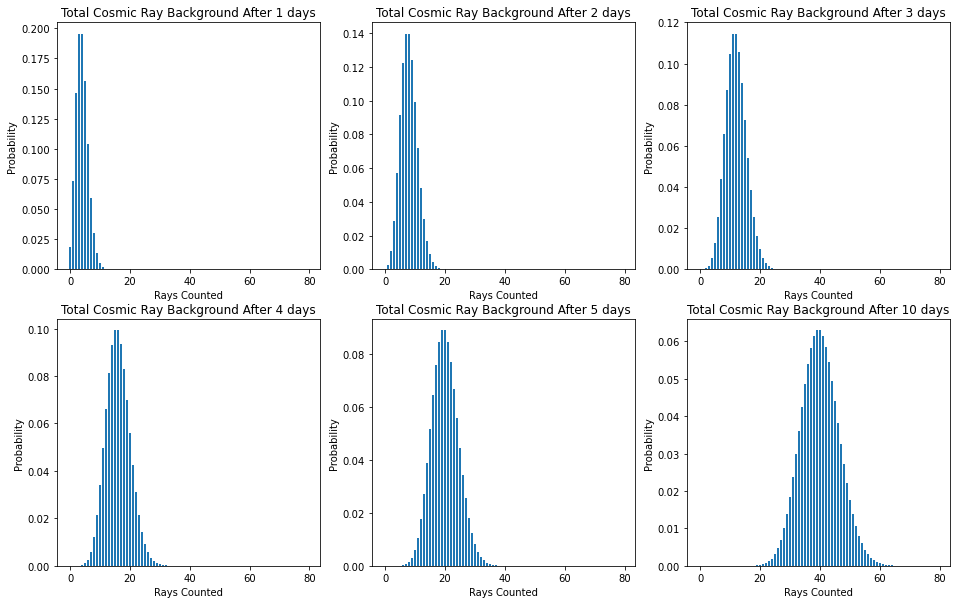

In [3]:
fig, ax = plt.subplots(2, 3)

ax[0,0].bar(k, bg1)
ax[0,1].bar(k, bg2)
ax[0,2].bar(k, bg3)
ax[1,0].bar(k, bg4)
ax[1,1].bar(k, bg5)
ax[1,2].bar(k, bg10)

day = [1,2,3,4,5,10]
i = 0
for y in range(2):
    for x in range(3):
        ax[y,x].set_title("Total Cosmic Ray Background After " + str(day[i]) + " days")
        i += 1
        ax[y,x].set_xlabel('Rays Counted')
        ax[y,x].set_ylabel('Probability')
        
plt.show()

As shown above, the distribution's mean, which is also the variance for a Poisson distribution, increases as we sum together more days. The mean equals the number of days 'd' times 'X' the mean for 1 day: $\mu = dX$

B) When you add up multiple days, the probability distrubution remains a Poisson distribution. For example, here is a $\mu = 20$ Poisson probability distribution function plotted over the distribution after 5 days: 

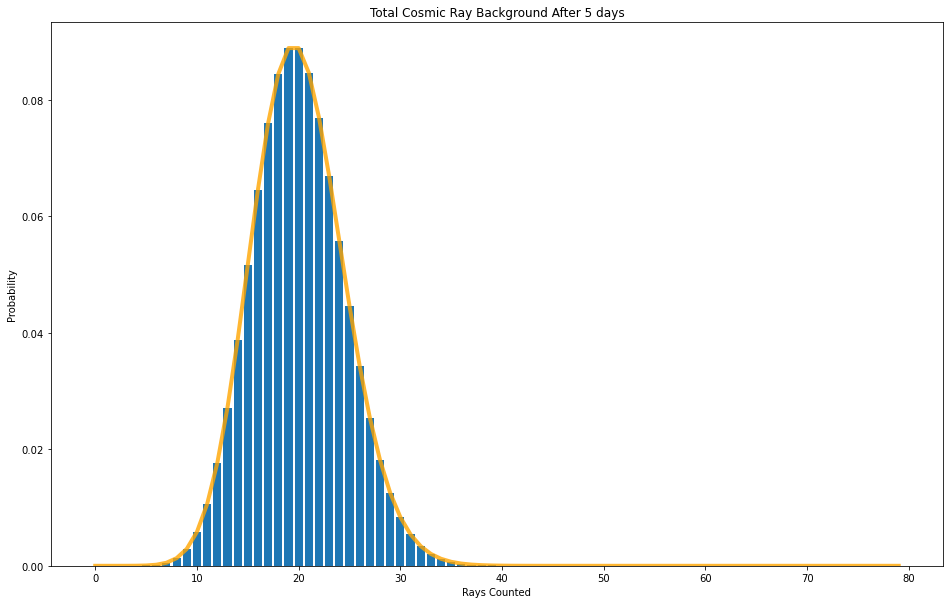

In [4]:
plt.close()
fig2, ax2 = plt.subplots()
ax2.bar(k, bg5)
ax2.set_title("Total Cosmic Ray Background After 5 days")
ax2.set_xlabel('Rays Counted')
ax2.set_ylabel('Probability')
ax2.plot(k, stats.poisson.pmf(k, mu=20), linewidth=4, alpha=0.8, color="orange")
plt.show()

As seen above, the two distributions match exactly. It makes sense that adding together Poisson distributions keeps the distribution a Poisson distribution because adding up two Poisson distributions adds their means and variances, and the Poisson distribution has its variance equal to its mean. So the mean and variance remain equal after adding up 5 Poisson distributions. 

C) Now let's see what happens when we find the mean number of rays per day, over multiple days:

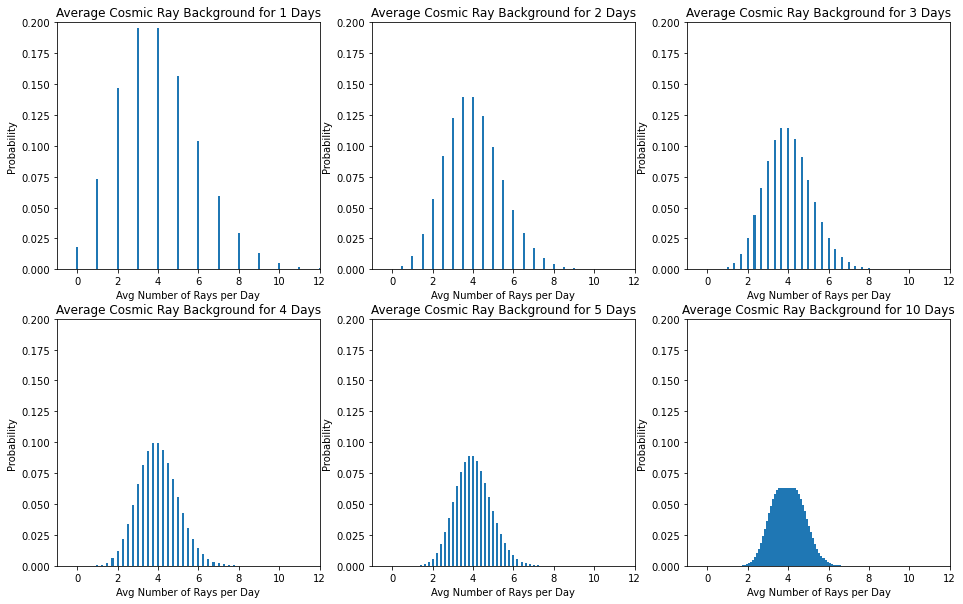

In [5]:
plt.close()
fig3, ax3 = plt.subplots(2, 3)

ax3[0,0].bar(k, bg1, width=0.1)
ax3[0,1].bar([k/2 for k in k], bg2, width=0.1)
ax3[0,2].bar([k/3 for k in k], bg3, width=0.1)
ax3[1,0].bar([k/4 for k in k], bg4, width=0.1)
ax3[1,1].bar([k/5 for k in k], bg5, width=0.1)
ax3[1,2].bar([k/10 for k in k], bg10)

day = [1,2,3,4,5,10]
i = 0
for y in range(2):
    for x in range(3):
        ax3[y,x].set_title("Average Cosmic Ray Background for " + str(day[i]) + " Days")
        i += 1
        ax3[y,x].set_xlabel('Avg Number of Rays per Day')
        ax3[y,x].set_ylabel('Probability')
        ax3[y,x].set_xlim(-1,12)
        ax3[y,x].set_ylim(0,0.2)

plt.show()

When you average across more days, the mean stays the same, and the variance decreases proportionally to the number of days. Additionally, according to the Central Limit Theorem, the distribution approaches a normal distribution as the number of days increases. We can see this in our graphs as the distribution is nearly symmetrical by day 10, compared to it being skewed on day 1.

D) When our source of gamma rays turns on, we should count more than the background number of rays. For example, if there are $N = 10$ days in a row when we only receive gamma rays from our source, we should see a total of $NY = 110$ gamma rays across those 10 days. To compute the significance of this observation in sigma, we compare it to the distribution for the sum of 10 days' worth of background.

In [6]:
prob = stats.poisson.sf(k=110, mu=40)
print("probability of getting 110 rays over 10 days from background = " + str(prob))
sigma = stats.norm.isf(prob)
print("sigma = " + str(sigma))

probability of getting 110 rays over 10 days from background = 2.5198126978719378e-20
sigma = 9.163166743444346


We find that the significance is 9.16 sigma. That is quite a high significance that exceeds the 5 sigma threshold for a discovery. The sigma would increase if we had more days of data, and decrease if we had less days of data.

### Problem 2



For problem 2, we need to pick a skewed continuous distribution. I will pick the exponential distribution, since it was also what I picked for Lab 1. The exponential distribution also happens to apply to the time intervals in between events in a Poisson distribution.

A) We will look at how the exponential distribution changes if we average it more times, such as measuring the time intervals between the arrivals of multiple cosmic rays:

600 1.0167592554489298
1199 1.0337993835410604


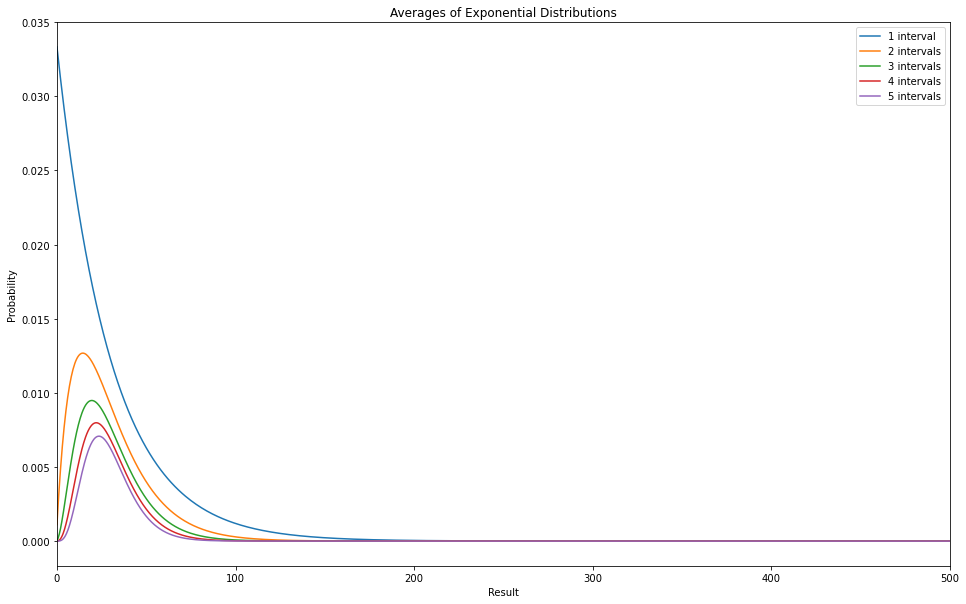

In [27]:
plt.close()

x = range(600)
ed1 = stats.expon.pdf(x, scale=30)
ed2 = signal.convolve(ed1, ed1)
print(len(ed1), sum(ed1))
print(len(ed2), sum(ed2))
ed3 = signal.convolve(ed2, ed1)
ed4 = signal.convolve(ed3, ed1)
ed5 = signal.convolve(ed4, ed1)
ed10 = signal.convolve(ed5, ed5)

fig4, ax4 = plt.subplots()
ax4.plot(x, ed1, label="1 interval")
ax4.plot([i/2 for i in range(0,len(ed2))], ed2, label="2 intervals")
ax4.plot([i/3 for i in range(0,len(ed3))], ed3, label="3 intervals")
ax4.plot([i/4 for i in range(0,len(ed4))], ed4, label="4 intervals")
ax4.plot([i/5 for i in range(0,len(ed5))], ed5, label="5 intervals")
#ax4.plot(np.linspace(0,10,num=len(ed10)), ed10, label="10 intervals")

ax4.set_xlabel("Result")
ax4.set_ylabel("Probability")
ax4.set_title("Averages of Exponential Distributions")
ax4.legend()
ax4.set_xlim(0, 500)
plt.show()
